### Tree classifiers and ensemble methods

* A simple decision tree classifier*
* Extremely random trees (Extra Trees)
* Bootstrap aggregating (bagging)
* Random Forests

In [1]:
# A Decision tree classifier applied to a 2D linearly separable data set
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

# Generate data at random
X_toy=np.random.uniform(0,1,size=200).reshape(100,2)
y_toy=1*(1-X_toy[:,0] - X_toy[:,1] < 0)

# Default parameter settings correspond to making the tree as large as possible
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_toy, y_toy)

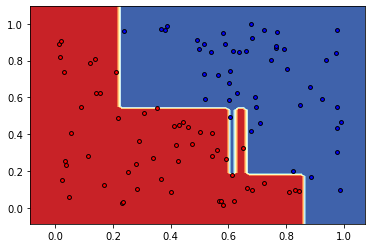

In [2]:
def draw_boundary(clf,X,y):
    # Draw the decision boundary of the classifier by classifying a "bunch" of
    # evenly spaced points which lie within the range of x_1 and x_2 and selecting
    # a color corresponding to the predicted class
    plot_colors = 'rby'
    plot_step = 0.02 # Density of grid
    n_classes= len(np.unique(y))
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    plt.show()
    
draw_boundary(clf,X_toy,y_toy)

We see that the decision boundary consists of line segments which are parallel to the coordinate axis.

In [3]:
# Breast cancer data set (from week 2)
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)
n_train=len(y_train)
n_test=len(y_test)
print("Size of Xtrain:", X_train.shape)
print("Size of Xtest:", X_test.shape)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Compare with 0.037 which we obtained previously with logistic regression
error_rate = np.average(y_test != y_pred)
print("Test set error rate: {:1.3f}".format(error_rate))

# An estimate o feature importance is obtained by examining how much the impurity decreases
# by adding a new input variable (calculations take place inside DecisionTreeClassifier.fit())

print("Top 5 input variables (features) which are most useful for classification:")
print(data.feature_names[np.argsort(-clf.feature_importances_)][0:5])

Size of Xtrain: (381, 30)
Size of Xtest: (188, 30)
Test set error rate: 0.085
Top 5 input variables (features) which are most useful for classification:
['mean concave points' 'worst perimeter' 'mean texture' 'worst radius'
 'worst concavity']


[Text(721.1076923076923, 815.4, 'X[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(489.32307692307694, 706.6800000000001, 'X[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(360.55384615384617, 597.96, 'X[10] <= 0.626\ngini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(257.53846153846155, 489.24, 'X[24] <= 0.178\ngini = 0.027\nsamples = 216\nvalue = [3, 213]'),
 Text(206.03076923076924, 380.52, 'X[14] <= 0.003\ngini = 0.018\nsamples = 215\nvalue = [2, 213]'),
 Text(103.01538461538462, 271.79999999999995, 'X[14] <= 0.003\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(51.50769230769231, 163.08000000000004, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(154.52307692307693, 163.08000000000004, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(309.04615384615386, 271.79999999999995, 'X[21] <= 33.35\ngini = 0.009\nsamples = 211\nvalue = [1, 210]'),
 Text(257.53846153846155, 163.08000000000004, 'gini = 0.0\nsamples = 199\nvalue = [0, 199]

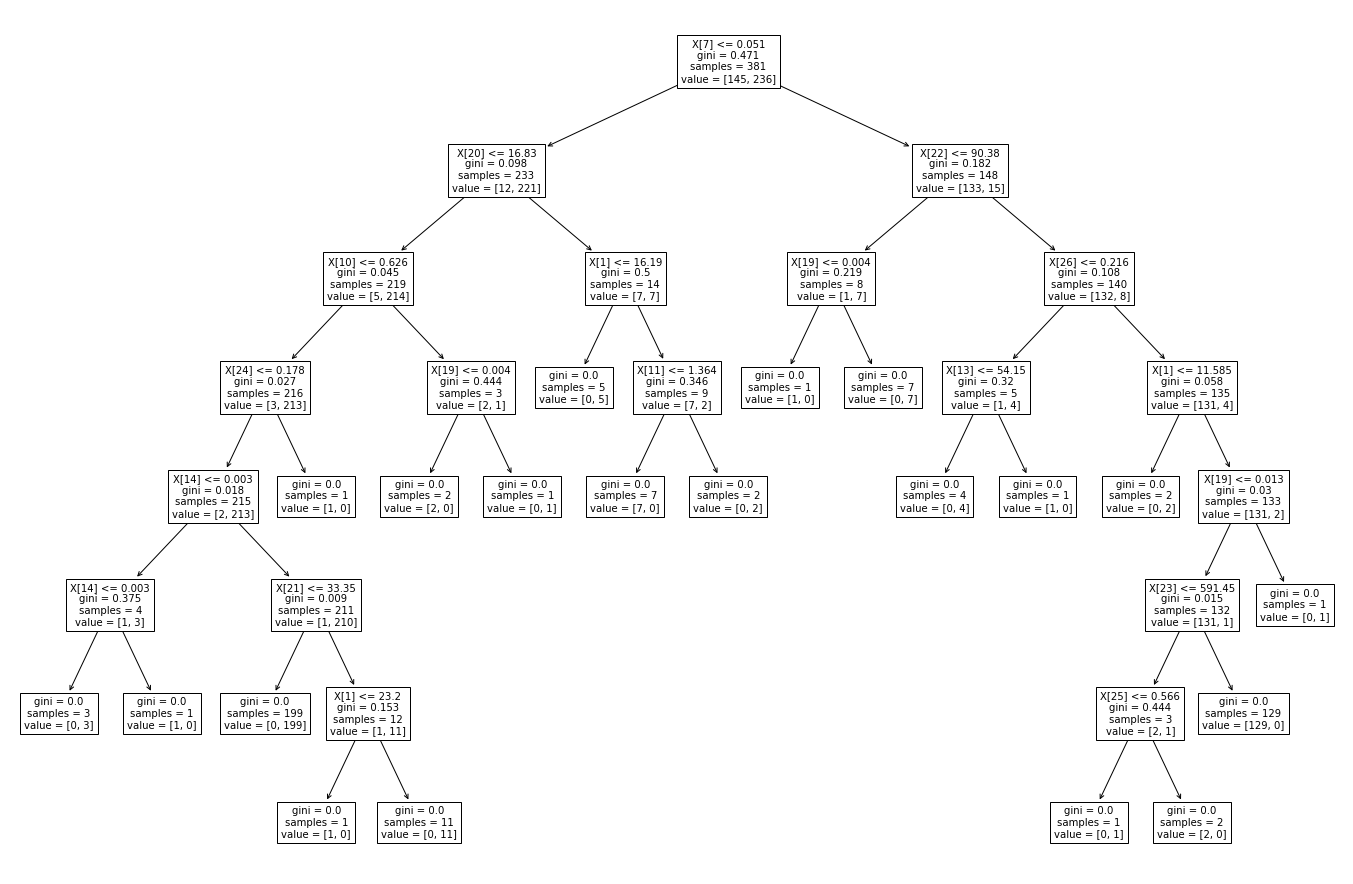

In [4]:
# Draw the decision tree
from sklearn import tree

plt.figure(figsize=(24,16))
tree.plot_tree(clf)

**ExtraTrees ensemble classifier**

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

ens = ExtraTreesClassifier(n_estimators=1000) # Default is 10 (way too low) or 100 (probably too low)
ens.fit(X_train, y_train)
y_pred = ens.predict(X_test)

# Bera saman við skekkju hér að ofan fyrir eitt tré (0.08)
error_rate = np.average(y_test != y_pred)
print("Test set error rate: {:1.3f}".format(error_rate))

print("Top 5 input variables (features) which are most useful for classification:")
print(data.feature_names[np.argsort(-ens.feature_importances_)][0:5])

Test set error rate: 0.027
Top 5 input variables (features) which are most useful for classification:
['worst concave points' 'mean concave points' 'worst radius'
 'worst perimeter' 'worst area']


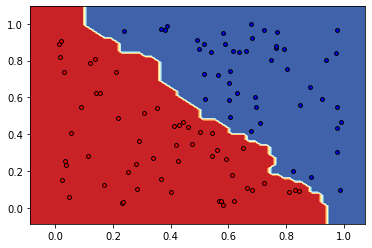

In [6]:
# Classify the 2D ("toy") data set from above and visualize the decision boundary
ens = ExtraTreesClassifier(n_estimators=1000)
ens.fit(X_toy, y_toy)

draw_boundary(ens, X_toy, y_toy)

The decision boundary is no longer parallel to the axis (at least it is not as obvious as before!)

In [7]:
# scikit-learn útfærir bagging aðferðafræðina þannig að hægt er að nota hana fyrir hvaða flokkara sem er
from sklearn.ensemble import BaggingClassifier

# Athugið að til að fá gott mat á out-of-bag nákvæmni (oob_score) þarf mörg tré
ens = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=1000, oob_score=True)
ens.fit(X_train, y_train)

print("Out-of-bag error rate: {:1.3f}".format(1-ens.oob_score_)) # Fæst út frá dæmum í þjálfunarsafni sem lenda "out-of-bag"
y_pred = ens.predict(X_test)
error_rate = np.average(y_test != y_pred)
print("Test set error rate: {:1.3f}".format(error_rate)) # Skekkjan er svipuð og out-of-bag error

Out-of-bag error rate: 0.055
Test set error rate: 0.053


**Random Forests** classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Default is 10 (way too low) or 100 (probably too low)
rf = RandomForestClassifier(n_estimators=1000, max_features='sqrt', oob_score=True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
error_rate = np.average(y_test != y_pred)

print("Test set error rate: {:1.3f}".format(error_rate)) # Bera saman við það sem fékkst fyrir Bagging hér að ofan
print("RF Out-of-bag error rate: {:1.3f}".format(1-rf.oob_score_))

Test set error rate: 0.043
RF Out-of-bag error rate: 0.050


**Note**: The scikit-learn implementation of Random Forests (RF) provides a measure of feature importance. The method is based on the Gini impurity measure, just like it is for "vanilla" decision trees, but this method does not work well for RF. Instead, one should use the sklearn.inspection.permutation_importance in conjunction with the RF classifier.

Random forests classifiers can be extended to clustering, identification of outliers, finding prototypes for classes, impute missing values. More details can be found here
https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm
Some of these extensions work reasonably well in practice, others less so (see e.g. chapter 15 in ESL).